<img src="https://www.rochester.edu/assets/images/ur-logo.svg">

# <center>[CSC 249/449: Machine Vision](https://www.cs.rochester.edu/~cxu22/t/249F20/)</center>

## Homework Submission
After completed the homework notebook. 
- Make sure you fill in any place that says `YOUR CODE HERE` or `YOUR ANSWER HERE`, as well as your NetID below.
- `Kernel`$\rightarrow$ `Restart & Run All` (in the menubar).
- You can generated zip file using following command:
    ```python
    NetID=''
    make_submission(NetID)
    ```
- Double-check **generated zip file**, text, math, code, outputs, figures. Re-run if needed.
- Sumbit the zip file via blackboard.
- 1% deduction of late assignment total score per hour passing the deadline.
---------


### Part 2. Neural Network Continued
### Problem 2.1

In this problem, we will try to optimize a Convex function with Adam optimizer.  
The function is similar to the Problem4 in the last assignment, except we want to find the $x$ so that
$$
x=\underset{x\in [-15,15]}{\operatorname{argmin}} f(x)
$$

You will try to use optimizer defined below to find the desired $x$ (Hint: should be aroung 1.3)

In [1]:
from cs249 import *

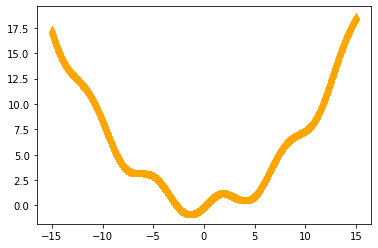

In [2]:
f = lambda x: 0.08*x.pow(2)+torch.sin(x)
x = torch.unsqueeze(torch.linspace(-15, 15, 1000), dim=1) 
y = f(x)
plt.scatter(x,y,marker='^',color = "orange")
plt.show()

In [3]:
# Adam (Adaptive Momemt Estimation)
x_init = torch.tensor(7.0, requires_grad=True)
optimizer = torch.optim.Adam([x_init], lr=1)

for i in range(100):
    optimizer.zero_grad()
    loss=f(x_init)
    loss.backward() # calculate gradients
    optimizer.step()
    print(x_init.detach().numpy())

6.0
4.999439
4.043033
3.2543273
2.6845875
2.2821481
1.9813094
1.729879
1.4874113
1.2202438
0.89912826
0.5014047
0.017594397
-0.54199654
-1.1427879
-1.7184088
-2.1780982
-2.456985
-2.5454822
-2.466588
-2.2540665
-1.9465417
-1.5884278
-1.2299304
-0.92042357
-0.69664025
-0.5761188
-0.5600397
-0.63901794
-0.7965576
-1.0098537
-1.2498763
-1.4830668
-1.6762016
-1.8033227
-1.8509893
-1.8193941
-1.7204161
-1.5746495
-1.4080615
-1.2479427
-1.1183167
-1.036078
-1.0091331
-1.0365427
-1.1097417
-1.2141572
-1.3312349
-1.4411696
-1.5262488
-1.574049
-1.5794923
-1.5452577
-1.4806998
-1.3997037
-1.3179009
-1.2497305
-1.2059435
-1.1920546
-1.2079036
-1.2481759
-1.30365
-1.3629936
-1.4149011
-1.4502264
-1.4636458
-1.4544652
-1.4264294
-1.38665
-1.343938
-1.3069243
-1.2823708
-1.2740052
-1.2820559
-1.3034909
-1.3328508
-1.3634951
-1.3890233
-1.404585
-1.4077963
-1.3990704
-1.3813188
-1.35913
-1.3376476
-1.3214179
-1.3134645
-1.3147662
-1.3242147
-1.3390185
-1.3554375
-1.3696777
-1.3787411
-1.3810444
-1.3

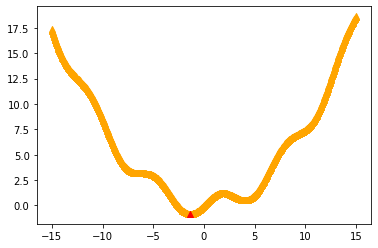

In [4]:
plt.scatter(x,y,marker='^',color = "orange")
plt.scatter(x_init.detach().numpy(),f(x_init).detach().numpy(),marker='^',color = "red")
plt.show()

### Problem 2.2

In convolutional neural network, a convolutional layer is actually implemented in **cross correlation**. 

To keep the consistency with convolutional neural network, implemente forward functions of 2D **corss correlation** layer.     

1. The operation should work for 3D image tensor of shape (C,H,W) where C denotes the number of channels.   
2. The operation should support **stride and padding**.   
3. [useful link](https://cs231n.github.io/convolutional-networks/)

In [11]:
def Conv2D(img, kernel, bias, stride, padding):
    """2D convolutional operation.
    
    Arguments
    ---------
        img : np.array
            A 3D array of shape (C,H,W).
        kernel : np.array, just a filter
            the weights of the kerel. 
            A 4D array of shape (out_channels, in_channels, kernel_height, kernel_width).
        bias : np.array
            the biases of the layer. 
            A 1D array of shape (out_channels).
        strides : tuple
            the strides of the convolution operation. 
            A tuple of shape (height_stride, width_stride).
        padding : tuple
            the number of zero paddings along the height and width. 
            A tuple of shape (height_padding, width_padding).

        kernel_size = kernel.shape
        stride = (stride, stride) if type(stride) == int else stride
        padding = (padding, padding) if type(padding) == int else padding


    Returns:
    --------
        The output of the layer. 
        A 3D array of shape (out_channels, out_heights, out_weights).
    """
    # 1. padding
    new_image = []
    m = padding
    n = padding
    C, H, W = img.shape
    for j in range(C):
        new_layer=[]
        for i in range(H + 2 * m):
            if i <= m-1 or i >= H + m:
                new_layer.append([0] * (W + 2 * n))
            else:
                new_layer.append([0] * n + img[j,i - m].tolist() + [0] * n)
        new_image.append(new_layer)
    img = numpy.array(new_image)
                
    # 2. check dimensions
    # check whether kernel's in_channel == img's depth channel
    
    out_channels, in_channels, kernel_height, kernel_width = kernel.shape
    if in_channels != C:
        print ("Error: Number of channels in both image and filter must match.")
        sys.exit()
        
    # check whether the filter is a square matrix
    if kernel_height != kernel_width:
        print("Error: Filter is not a square matrix")
        sys.exit()
        
    # check whether the size of the filter is odd
    if kernel_height % 2 == 0:
        print("Error: Filter size must be an odd")
        sys.exit()
        
    # check the dimension of H_after and W_after
    p = stride
    q = stride
    #if (H - kernel_height + 2 * m) % p != 0:
    #    print("Error: the new height is not integer")
        
    #if (W - kernel_width + 2 * n) % q != 0:
    #   print("Error: the new width is not integer")
        
    # H_after = (H - kernel_height + 2 * m) / p
    # W_after = (W - kernel_height + 2 * n) / q
    
    # 3. conv operation
    out_heights = (H - kernel_height + 2 * m) / p
    out_widths = (W - kernel_width + 2 * n) / q
    out = numpy.zeros(shape = (int(out_channels), int(out_heights), int(out_widths)))
    
    for k in range(int(out_channels)):
        for i in range(int(out_heights)):
            for j in range(int(out_widths)):
                out[k,i,j] = numpy.sum(img[:,p*i:p*i+kernel_height,q*j:q*j+kernel_width]*kernel[k]) + bias[k]
                
    return out

In [12]:
with open(data/'conv_cases.pkl', 'rb') as conv_f:
    conv_cases = pickle.load(conv_f)
    for case in conv_cases:
        weight = case['weight']
        bias = case['bias']
        x = case['x']
        out = case['out']
        stride = case['stride']
        pad = case['pad']
        conved= Conv2D(x,weight,bias,stride,pad)
        assert np.allclose(conved, conved),'not pass'
    print("Implemented Correctly")

Implemented Correctly


### Problem 2.3 CNN with CIFAR-10
#### a.prepare dataset

Files already downloaded and verified
Files already downloaded and verified


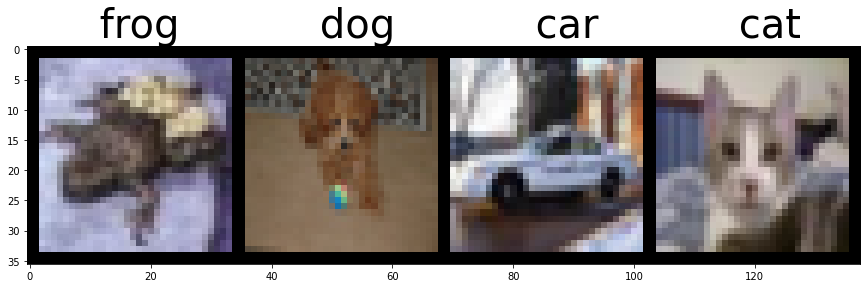

In [23]:
transform = transforms.Compose([transforms.ToTensor()])
trainset = torchvision.datasets.CIFAR10(root=data, train=True,download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,shuffle=True, num_workers=2)
testset = torchvision.datasets.CIFAR10(root=data, train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4,shuffle=True, num_workers=2)
classes = ('plane', 'car', 'bird', 'cat','deer', 'dog', 'frog', 'horse', 'ship', 'truck')
dataiter = iter(trainloader)
images, labels = dataiter.next()
plt.figure(figsize=(16,4))
plt.imshow(np.transpose(torchvision.utils.make_grid(images).numpy(), (1, 2, 0)))
plt.title('         '.join('%5s' % classes[labels[j]] for j in range(4)),fontsize=40,)
plt.show()

#### b. define network
- Two-layer CNN with maxpooling in between, following with 2 FC layers for classification
- Use `LeakyReLU` as your activation function
- You need to choose your own parameter for above layer to get a good result
- Please visist https://pytorch.org/docs/stable/nn.html for reference

In [25]:
# -> conv2d -> relu -> maxpool2d -> conv2d -> relu -> maxpool2d -> view -> linear -> relu -> linear -> relu -> linear
import torch.nn as nn
import torch.nn.functional as F

class Net(torch.nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.leaky_relu(self.conv1(x)))
        x = self.pool(F.leaky_relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

#### c. define criterion and optimizer

1. Define criterion for multi-label classification
2. Define optimizer for training net.parameter()
3. You need to choose your own parameter for optimizer

In [26]:
net = Net()
net = net.cuda()
optimizer = torch.optim.Adam(net.parameters(), lr=5e-3)
criterion = torch.nn.CrossEntropyLoss()

#### d. training
The same as before, for training, 
1. calculate the loss wrt the ground-truth 
2. backdrop the loss to optimize the network.
3. compute accuracy at the end of **each epoch**

Plot the loss for each epoch which is defined as the average of all sample's loss within one epoch  

Hint:use below snippet to put data on GPU

>```python
>inputs = inputs.cuda()
>labels = labels.cuda()
>```

In [27]:
inputs = images.cuda()
labels = labels.cuda()
for epoch in range(10):  # loop over the dataset multiple times
    optimizer.zero_grad() 
    # Forward pass
    y_pred = net(inputs)
    # Compute loss
    loss = criterion(y_pred, labels)
    # Print loss in each iteration
    print('Epoch {}: train loss: {}'.format(epoch, loss.item()))
    # Backward pass
    loss.backward()
    optimizer.step()

Epoch 0: train loss: 2.3747899532318115
Epoch 1: train loss: 2.3264102935791016
Epoch 2: train loss: 2.245676040649414
Epoch 3: train loss: 2.012387275695801
Epoch 4: train loss: 1.7811003923416138
Epoch 5: train loss: 1.568324327468872
Epoch 6: train loss: 1.3871946334838867
Epoch 7: train loss: 1.4175713062286377
Epoch 8: train loss: 1.4170256853103638
Epoch 9: train loss: 1.3168458938598633
